## Figure 4 - chemical datasets, new-cell-line split

In [4]:
##Here we have code to replicate figures included in Figure 3 of main paper
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
import sys
sys.path.append('../')
from constants import *
import os
import numpy as np
from scipy import stats
import networkx as nx
import pickle
import torch

outdir = 'processed'
os.makedirs(outdir, exist_ok = True)

/home/gonzag46/scratch/conda/envs/pdgrapher/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
base_path = '../../results_metrics_aggregated_bme/perturbagen_pred'

In [6]:
##########
#Mechanistic baselines
##########
df = pd.read_csv(osp.join(base_path, 'baselines/chemical_cross.csv'))
df['Metric'] = df['Metric'].replace('ranking score', 'rankings')

# Initialize an empty dictionary
performance = {}

# Iterate over the rows of the DataFrame
for _, row in df.iterrows():
    metric = row['Metric']
    baseline = row['Baseline']
    if baseline == 'random': baseline = "Random"
    if baseline == 'cancer_targets': baseline = "Cancer targets"
    if baseline == 'cancer_genes': baseline = "Cancer genes"
    cellline = row['Cellline']
    folds = [row['Fold 1'], row['Fold 2'], row['Fold 3'], row['Fold 4'], row['Fold 5']]
    
    # Initialize nested dictionaries if not already present
    if cellline not in performance:
        performance[cellline] = {}
    if metric not in performance[cellline]:
        performance[cellline][metric] = {}
    if baseline not in performance[cellline][metric]:
        performance[cellline][metric][baseline] = []
    
    # Add the folds data to the dictionary
    performance[cellline][metric][baseline] = folds

# Print the resulting dictionary
# import pprint
# pprint.pprint(performance)

In [7]:
##########
#Biolord
##########

paths = glob(osp.join(base_path, 'Biolord/cross/biolord_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    
            
    if df.iloc[0]['cellline1'] == 'HA1E':
        continue
    
    train_cell = df.iloc[0]['cellline1']
        
    # Process the new DataFrame to update the dictionary
    method_name = 'Biolord'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions']

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']

        if cellline == train_cell:
            continue
        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [8]:
##########
#CellOT
##########

paths = glob(osp.join(base_path, 'cellOT/cross/cellot_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'CellOT'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions']

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [9]:
##########
#ChemCPA
##########

paths = glob(osp.join(base_path, 'ChemCPA/cross/chemCPA_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    
    if df['cellline1'].iloc[0] == 'HA1E':
        continue
    
    train_cell = df['cellline1'].iloc[0]

    # Process the new DataFrame to update the dictionary
    method_name = 'ChemCPA'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions']

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        if cellline == train_cell:
            continue

        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [10]:
##########
#scGen
##########

paths = glob(osp.join(base_path, 'scGEN/cross/scgen_chemical_r2_*_topk.csv'))

for path in paths:

        
    df = pd.read_csv(path)
    
    
    if df['cellline1'].iloc[0] == 'HA1E':
        continue
    
    train_cell = df['cellline1'].iloc[0]
    
    # Process the new DataFrame to update the dictionary
    method_name = 'scGen'

    # List the columns for which you want to compute the mean
    columns_of_interest = ['recall_at_1', 'recall_at_10', 'recall_at_100', 
                        'recall_at_1000', 'rankings', 'perc_partially_accurate_predictions']

    # Group by 'cellline2' and calculate the mean for the specified columns
    df_grouped = df.groupby('cellline2')[columns_of_interest].mean().reset_index()

    # Iterate over the rows of the new DataFrame
    for _, row in df_grouped.iterrows():
        cellline = row['cellline2']
        
        if cellline == train_cell:
            continue

        
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [11]:
##########
#PDGrapher
##########

paths = glob(osp.join(base_path, 'PDgrapher/cross/chemical/val/*_cross_best.csv'))

for path in paths:
    df = pd.read_csv(path)
    df = df[df['Set'] == 'Test']
    
    
    # Process the new DataFrame to update the dictionary
    method_name = 'PDGrapher'


    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        
        if row['Cellline1'] == 'HA1E':
            continue
        
        train_cell = row['Cellline1']
        
        cellline = row['Cellline2']
        
        if cellline == train_cell:
            continue
        
        metric = row['Metric']
        if metric == 'ranking score':
            metric = 'rankings'
        value = row['Mean']
        
        
        metric_data = {
            metric: value
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [12]:
# Delete 'HA1E' from the performance dictionary
if 'HA1E' in performance:
    del performance['HA1E']

In [13]:
cell_line_to_cancer_type = {
    'A549': 'Lung-A549',
    'A375': 'Skin-A375',
    'BT20': 'Breast-BT20',
    'HELA': 'Cervix-HELA',
    'HT29': 'Colon-HT29',
    'MCF7': 'Breast-MCF7',
    'MDAMB231': 'Breast-MDAMB231',
    'PC3': 'Prostate-PC3',
    'VCAP': 'Prostate-VCAP',
    'BICR6': 'Head-BICR6',
    'U251MG': 'Brain-U251MG',
    'YAPC': 'Pancreas-YAPC',
    'ES2': 'Ovary-ES2',
    'AGS': 'Stomach-AGS'
}

In [14]:
performance

{'A375': {'recall@1': {'Cancer genes': [0.0010365221632827,
    0.0009101036914979,
    0.0008999587884663,
    0.0009961617311599,
    0.0010433964452191],
   'Cancer targets': [0.0023665768768739,
    0.0022422697916839,
    0.0026790122792608,
    0.0023073007834518,
    0.0023843873870504],
   'Random': [7.289300696804543e-05,
    4.201164954612978e-05,
    9.733157738838884e-05,
    0.0001040601021106,
    7.124915693977122e-05],
   'Biolord': [0.0021177663122768,
    0.00674076066251984,
    0.00621849176334968,
    0.0029206193500284,
    0.0032791238707788597,
    0.00309569824326878,
    0.00600424458476022,
    0.0061349881295759395],
   'CellOT': [0.0015309545593168,
    0.0035071668191521,
    0.000914913083257,
    0.0047052672853221,
    0.0212154877754145,
    0.0095298165289016,
    0.0027483698572445],
   'ChemCPA': [0.004800929410516399,
    0.004073600303819281,
    0.0031602970364390604,
    0.00654842393219886,
    0.0059848234934832805,
    0.0041937712767903795,


## Panel proportion of partially accurate samples

/tmp/ipykernel_2058626/67616245.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


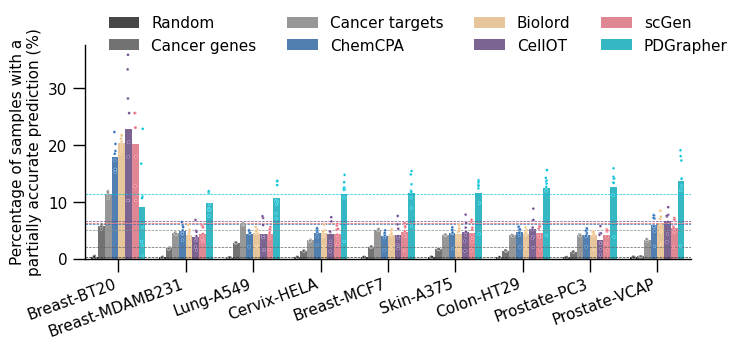

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Extract the data for 'rankings' into a DataFrame
metric = 'percentage of samples with partially accurate predictions'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()
#Rename cell lines
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)  
ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)


# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.55, 1.20), loc='upper center', ncol=4, frameon=False, title=None)
    plt.subplots_adjust(right=0.95, bottom = 0.25)    
    plt.xticks(rotation=20, ha="right")
    plt.ylabel('Percentage of samples with a\npartially accurate prediction (%)')
    plt.savefig(osp.join(outdir, 'panel_partially_accurate_pred.pdf'))
    plt.show()




In [16]:
df = df_mean
metric = 'percentage of samples with partially accurate predictions'
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Absolute Difference'] = abs(comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest'])

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Absolute Difference']]
comparison_df.sort_values(by = 'Absolute Difference', ascending = False)

,Cell Line,Method_SecondBest,percentage of samples with partially accurate predictions_PDGrapher,percentage of samples with partially accurate predictions_SecondBest,Absolute Difference
2,Breast-BT20,CellOT,9.086204,22.756410,13.670207
7,Prostate-PC3,ChemCPA,12.547996,4.273222,8.274774
4,Colon-HT29,CellOT,12.405878,5.318139,7.087739
8,Prostate-VCAP,CellOT,13.710347,6.639566,7.070781
0,Skin-A375,CellOT,11.657176,4.718337,6.938839
3,Cervix-HELA,Biolord,11.426525,4.571045,6.855479
5,Breast-MCF7,Cancer targets,11.582816,5.130290,6.452526
6,Breast-MDAMB231,ChemCPA,9.800990,4.942863,4.858127
1,Lung-A549,Cancer targets,10.656926,6.119481,4.537446


## Panel ranking

/tmp/ipykernel_2058626/508052590.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


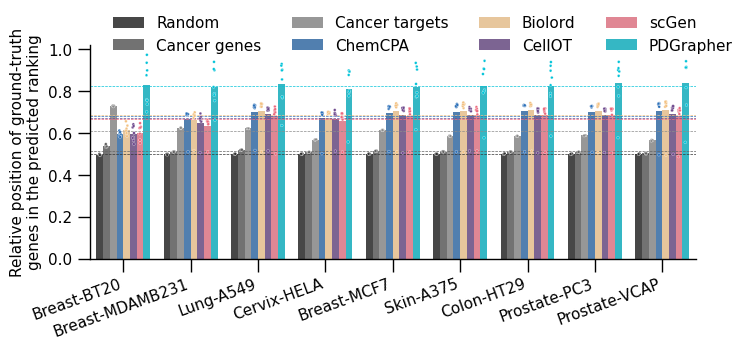

In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Extract the data for 'rankings' into a DataFrame
metric = 'rankings'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()
#Rename cell lines
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']

# Order cell lines based on values for PDGrapher
# pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)



    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.55, 1.20), loc='upper center', ncol=4, frameon=False, title=None)
    plt.subplots_adjust(right=0.95, bottom = 0.25)
    plt.xticks(rotation=20, ha="right")
    plt.ylabel('Relative position of ground-truth\ngenes in the predicted ranking')
    plt.savefig(osp.join(outdir, 'panel_ranking.pdf'))
    plt.show()


In [18]:
df = df_mean
metric = 'rankings'
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Absolute Difference'] = abs(comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest'])

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Absolute Difference']]
comparison_df.sort_values(by = 'Absolute Difference', ascending = False)

,Cell Line,Method_SecondBest,rankings_PDGrapher,rankings_SecondBest,Absolute Difference
6,Breast-MDAMB231,ChemCPA,0.818134,0.666337,0.151796
3,Cervix-HELA,Biolord,0.811082,0.671357,0.139725
7,Prostate-PC3,Biolord,0.835933,0.705074,0.130860
1,Lung-A549,Biolord,0.835139,0.705230,0.129908
8,Prostate-VCAP,Biolord,0.837135,0.708976,0.128159
0,Skin-A375,Biolord,0.826027,0.706497,0.119530
4,Colon-HT29,Biolord,0.824508,0.707073,0.117435
5,Breast-MCF7,Biolord,0.817817,0.704404,0.113413
2,Breast-BT20,Cancer targets,0.829046,0.728549,0.100497


## Panes recal@k

/tmp/ipykernel_2058626/2826275394.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


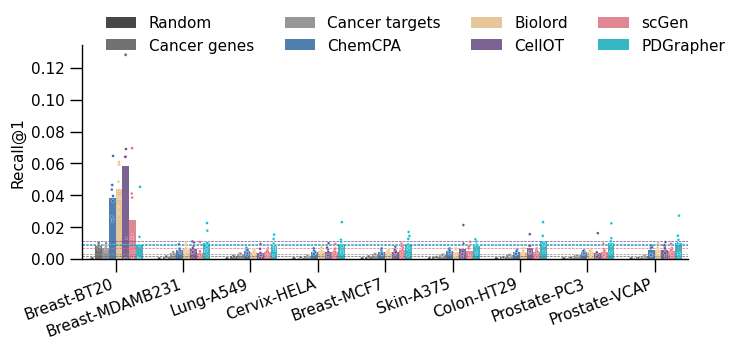

         Cell Line Method_SecondBest  recall@1_PDGrapher  recall@1_SecondBest  \
2      Breast-BT20            CellOT            0.008539             0.058304   
7     Prostate-PC3             scGen            0.010104             0.004452   
4       Colon-HT29            CellOT            0.011088             0.006604   
8    Prostate-VCAP            CellOT            0.010113             0.005842   
3      Cervix-HELA           Biolord            0.009245             0.005121   
5      Breast-MCF7             scGen            0.009283             0.005464   
6  Breast-MDAMB231           Biolord            0.009782             0.006132   
1        Lung-A549           ChemCPA            0.008132             0.004792   
0        Skin-A375            CellOT            0.008156             0.006307   

   Absolute Difference  
2             0.049765  
7             0.005652  
4             0.004484  
8             0.004271  
3             0.004124  
5             0.003819  
6             

/tmp/ipykernel_2058626/2826275394.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


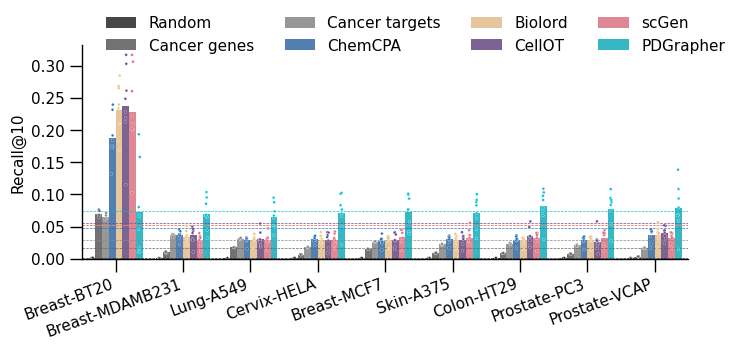

         Cell Line Method_SecondBest  recall@10_PDGrapher  \
2      Breast-BT20            CellOT             0.072788   
4       Colon-HT29            CellOT             0.081480   
7     Prostate-PC3             scGen             0.077876   
3      Cervix-HELA           ChemCPA             0.071485   
0        Skin-A375             scGen             0.071796   
5      Breast-MCF7             scGen             0.073113   
8    Prostate-VCAP            CellOT             0.078576   
1        Lung-A549    Cancer targets             0.065554   
6  Breast-MDAMB231            CellOT             0.070131   

   recall@10_SecondBest  Absolute Difference  
2              0.238057             0.165269  
4              0.034972             0.046508  
7              0.032117             0.045759  
3              0.030196             0.041289  
0              0.031712             0.040084  
5              0.034642             0.038471  
8              0.040667             0.037909  
1            

/tmp/ipykernel_2058626/2826275394.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


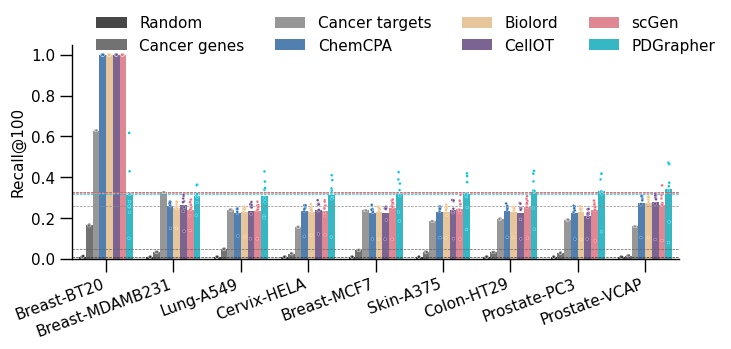

         Cell Line Method_SecondBest  recall@100_PDGrapher  \
2      Breast-BT20           Biolord              0.310588   
7     Prostate-PC3             scGen              0.332726   
0        Skin-A375             scGen              0.316658   
3      Cervix-HELA            CellOT              0.313032   
4       Colon-HT29             scGen              0.327220   
5      Breast-MCF7             scGen              0.319676   
1        Lung-A549    Cancer targets              0.310178   
8    Prostate-VCAP            CellOT              0.340662   
6  Breast-MDAMB231    Cancer targets              0.307476   

   recall@100_SecondBest  Absolute Difference  
2               1.000000             0.689412  
7               0.240518             0.092207  
0               0.242469             0.074189  
3               0.240988             0.072044  
4               0.255767             0.071453  
5               0.248497             0.071180  
1               0.240484             0.0696

/tmp/ipykernel_2058626/2826275394.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


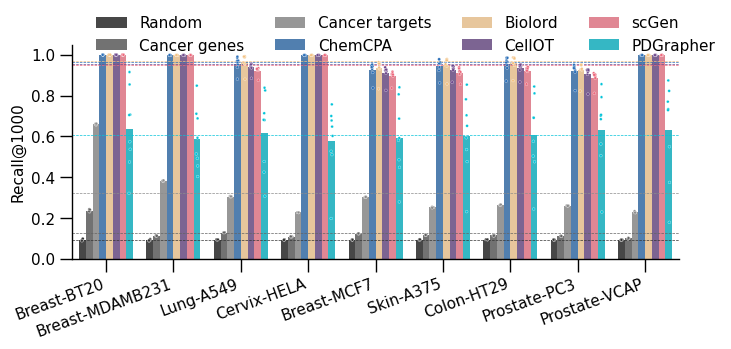

         Cell Line Method_SecondBest  recall@1000_PDGrapher  \
3      Cervix-HELA           Biolord               0.577573   
6  Breast-MDAMB231            CellOT               0.588314   
8    Prostate-VCAP            CellOT               0.629083   
2      Breast-BT20           Biolord               0.636001   
4       Colon-HT29           Biolord               0.604779   
0        Skin-A375           Biolord               0.603460   
1        Lung-A549           Biolord               0.618444   
5      Breast-MCF7           Biolord               0.589995   
7     Prostate-PC3           Biolord               0.629771   

   recall@1000_SecondBest  Absolute Difference  
3                0.998205             0.420632  
6                0.998355             0.410040  
8                0.998483             0.369400  
2                1.000000             0.363999  
4                0.959633             0.354855  
0                0.950674             0.347213  
1                0.964105 

In [19]:

# Extract the data for 'rankings' into a DataFrame
for metric in ['recall@1', 'recall@10', 'recall@100', 'recall@1000']:
    data = []
    for cellline, metrics in performance.items():
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, method, value])

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

    # Calculate the mean 'rankings' for each cell line and method
    df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()
    #Rename cell lines
    df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
    df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
    # Replace x-axis labels with cancer types
    df['Cell Line'] = df['Cancer Type']
    df_mean['Cell Line'] = df_mean['Cancer Type']
    # Order cell lines based on values for PDGrapher
    # pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
    # ordered_cell_lines = pdgrapher_means['Cell Line']

    # Reorder the DataFrame based on ordered cell lines
    df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
    df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

    # Define a color palette that matches the existing figures
    palette = {
        'Biolord': '#f3c283',
        'ChemCPA': '#2C70B9',
        'PDGrapher': '#04C4D9',
        'Cancer genes': '#636363',
        'Cancer targets': '#8C8C8C',
        'CellOT': '#6f4a8e',
        'Random': '#333333',
        'scGen': '#ED697D'
    }

    # Define the order of methods
    method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

    with sns.plotting_context(plotting_context):
        # Initialize the plot
        fig, ax = plt.subplots(figsize=(7.35, 3.4))

        # Create a bar plot for each method
        sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

        # Overlay individual data points
        sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





        # Add horizontal lines for the overall mean ranking for each method
        for method in method_order:
            overall_mean = df[df['Method'] == method][metric].mean()
            plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

        # Remove title
        plt.title('')
        plt.ylim

        # Remove X-axis label
        plt.xlabel('')
        sns.despine()

        # Adjust legend to only include the bars and place it at the top
        handles, labels = plt.gca().get_legend_handles_labels()
        bar_handles = handles[:len(method_order)]
        bar_labels = labels[:len(method_order)]
        plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.55, 1.20), loc='upper center', ncol=4, frameon=False, title=None)
        plt.subplots_adjust(right=0.95, bottom = 0.25)
        plt.xticks(rotation=20, ha="right")
        plt.ylabel(metric.capitalize())
        plt.savefig(osp.join(outdir, 'panel_{}.pdf'.format(metric)))
        plt.show()
        
    df = df_mean
    # Step 1: Filter out the data for PDGrapher
    pdgrapher_df = df[df['Method'] == 'PDGrapher']

    # Step 2: Identify the second-best method for each cell line
    second_best_df = df[df['Method'] != 'PDGrapher'].copy()

    # Group by cell line and find the second best method (highest value)
    second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
    second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

    # Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
    comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

    # Step 4: Calculate the absolute difference
    comparison_df['Absolute Difference'] = abs(comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest'])

    # Display the result
    comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Absolute Difference']]
    print(comparison_df.sort_values(by = 'Absolute Difference', ascending = False))

## Panel aggregated recall@k

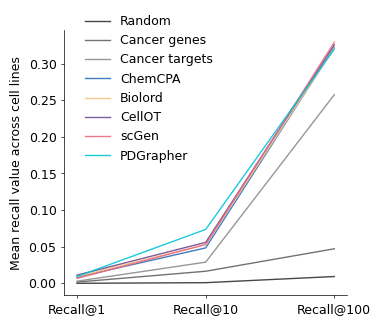

In [20]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty list to store the data
data = []

# Iterate over the performance dictionary to extract all recall metrics
for cellline, metrics in performance.items():
    for metric in ['recall@1', 'recall@10', 'recall@100']:
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, metric, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Metric', 'Method', 'Value'])

# Convert the 'Value' column to numeric to avoid any conversion issues
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Calculate the mean for each method and metric across all cell lines
df_mean = df.groupby(['Metric', 'Method'])['Value'].mean().reset_index()



# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']
df_mean['Metric'] = [e.capitalize() for e in df_mean['Metric']]
with sns.plotting_context(plotting_context_small):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(3.675, 3.4))

    # Create a line plot for each method showing the mean across all cell lines
    sns.lineplot(data=df_mean, x='Metric', y='Value', hue='Method', palette=palette, hue_order=method_order, markers=True, dashes=False, alpha=0.9)

    # Remove X-axis label
    plt.xlabel('')

    sns.despine()

    # Adjust legend to place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    line_handles =  handles[:len(method_order)]
    line_labels = labels[:len(method_order)]
    plt.legend(line_handles, line_labels, bbox_to_anchor=(0.45, 1.13), loc='upper center', ncol=4, frameon=False, title=None)
    plt.legend(line_handles, line_labels, bbox_to_anchor=(0.3, 1.10), loc='upper center', ncol=1, frameon=False, title=None)
    # plt.subplots_adjust(top=0.9)
    plt.subplots_adjust(right=0.92, bottom = 0.1, left=0.15)
    plt.ylabel('Mean recall value across cell lines')
    plt.savefig(osp.join(outdir, 'aggregated_mean_recall_metrics.pdf'))
    plt.show()


## Panel all metrics ranking

/tmp/ipykernel_2058626/1089312481.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Methods', y='rank', data=df, order=method_order, palette=palette, showfliers=False)


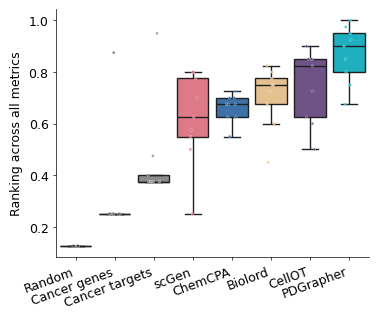

In [21]:
df = pd.read_csv(osp.join(base_path, 'rank_table_chemical_cross.csv'))
df = df.groupby(['Methods', 'Cellline']).mean().reset_index()

# Rename the methods in the 'Methods' column
df['Methods'] = df['Methods'].replace({
    'BL Rand Cancer Genes': 'Cancer genes',
    'BL Rand Cancer Target': 'Cancer targets',
    'BL Rand Random': 'Random',
    'chemCPA': 'ChemCPA',
    'PDgrapher': 'PDGrapher',
    'scGEN': 'scGen'
})

df['rank'] = df['rank']/len(df.Methods.unique())

import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom palette
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D'
}

# Order of methods
# method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'CellOT', 'Biolord', 'scGen', 'PDGrapher']
# Calculate the mean rank for each method
mean_rank = df.groupby('Methods')['rank'].mean().reset_index()

# Sort the methods based on mean rank
method_order = mean_rank.sort_values('rank')['Methods'].tolist()
with sns.plotting_context(plotting_context_small):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(3.675, 3.4))
    # Create the box plot with method order and custom palette
    sns.boxplot(x='Methods', y='rank', data=df, order=method_order, palette=palette, showfliers=False)

    # Add individual data points with matching colors
    sns.stripplot(x='Methods', y='rank', data=df, hue='Methods', alpha=0.8, hue_order=method_order, palette=palette, edgecolor="white", linewidth=0.2, size=2, jitter=0.15)

    # Remove the legend for the stripplot
    plt.legend([], [], frameon=False)

    # Show the plot
    plt.title('')
    plt.ylabel('Ranking across all metrics')
    plt.xlabel('')
    plt.subplots_adjust(right=1, bottom = 0.15, left=0.15)
    plt.xticks(rotation=20, ha="right")

    sns.despine()
    
    plt.savefig(osp.join(outdir, 'panel_all_metrics_ranking.pdf'))
    plt.show()



## Panels distance between predicted genes and GT genes in the PPI (PDGrapher vs random)

In [22]:
outdir = 'distance_predicted_targets_and_gt'
os.makedirs(outdir, exist_ok=True)

cell_lines = ["A549", "A375", "BT20", "HELA", "HT29", "MCF7", "MDAMB231", "PC3", "VCAP"]


all_lengths_ours_to_real = {c: [] for c in cell_lines}
all_lengths_random_to_real = {c: [] for c in cell_lines}
cell_line_path_dict = {}


if not osp.exists(osp.join(outdir, 'all_ours_to_real.pickle')):
    
    for cell_line in cell_lines:
        
        #Loads edge index 
        base_path = "../../data/processed/torch_data/chemical/real_lognorm"
        path_edge_index = osp.join(base_path, 'edge_index_{}.pt'.format(cell_line))
        edge_index = torch.load(path_edge_index)
        G = nx.Graph() 
        G.add_edges_from(tuple(zip(edge_index[0,:].tolist(), edge_index[1,:].tolist())))

        #For each cell line, I take the best model, and take the retrieved and real interventions (these are for the remaining cell lines)
        #Then I proceed to compute distances
        performance = pd.read_csv('../../results_metrics_aggregated_bme/perturbagen_pred/PDgrapher/within/chemical/val/{}_drugpred_within_best.csv'.format(cell_line))
        
        ngnn = performance[performance['Set'] == 'Test']['GNN'].iloc[0]
        model_path = glob('../../experiments_resubmission_bme/results/chemical/{}_corrected_pos_emb/n_gnn_{}*'.format(cell_line, ngnn))[0]
        
        
        our_predicted_interventions_all_test = pickle.load(open(osp.join(model_path, 'retrieved_interventions_cross.pkl'), "rb"))
        our_real_interventions_all_test = pickle.load(open(osp.join(model_path, 'real_interventions_cross.pkl'), "rb"))
        

        #Sanity checks
        for i in our_real_interventions_all_test.keys():
            for j in our_real_interventions_all_test[i].keys():
                assert len(our_predicted_interventions_all_test[i][j]) == len(our_real_interventions_all_test[i][j]), "predicted and real interventions should have the same length (our model)"

        
        
        for cell_line_test in our_predicted_interventions_all_test:
            #Outpath
            outpath = osp.join(outdir, '{}'.format(cell_line_test))
            os.makedirs(outpath, exist_ok=True)
            cell_line_path_dict[cell_line] = outpath
            
            
            our_predicted_interventions = our_predicted_interventions_all_test[cell_line_test]
            our_real_interventions = our_real_interventions_all_test[cell_line_test]
            
            #Loads the random predictions for the test cell line
            random_path = '../../baselines/mechanistic/results/mechanistic/baseline_random_chemical/new_cell_line/random/{}/random'.format(cell_line_test)
            random_predicted_interventions = pickle.load(open(osp.join(random_path, 'retrieved_interventions.pkl'), "rb"))
            random_real_interventions = pickle.load(open(osp.join(random_path, 'real_interventions.pkl'), "rb"))
            
            # import pdb; pdb.set_trace()
            #Sanity checks
            for i in our_predicted_interventions.keys():
                    assert len(random_predicted_interventions[i]) == len(random_real_interventions[i]), "predicted and real interventions should have the same length (random model)"
                    assert len(random_predicted_interventions[i]) == len(our_real_interventions[i]), "our model and random model should have the same length"
            
            
            #Computes the distances if not pre-saved
            if not os.path.exists(osp.join(outpath, 'random_to_real.txt')):
                length = dict(nx.all_pairs_shortest_path_length(G))
                lengths_ours_to_real = []
                lengths_random_to_real = []
                for split_index in our_predicted_interventions.keys():
                    pred_ours = our_predicted_interventions[split_index]
                    pred_random = random_predicted_interventions[split_index]
                    real = our_real_interventions[split_index]
                    
                    #Subsets to 10% of samples (randomly selected) for computational tractability
                    selected_indices = random.sample(range(len(pred_ours)), int(0.1 * len(pred_ours)))
                    pred_ours = [pred_ours[i] for i in selected_indices]
                    pred_random = [pred_random[i] for i in selected_indices]
                    real = [real[i] for i in selected_indices]
                    
                    
                    for i in range(len(pred_ours)):
                        pred_ours_i = pred_ours[i]
                        pred_random_i = pred_random[i]
                        real_i = real[i]
                        for j in range(len(real_i)):
                            for jj in range(len(real_i)):
                                lengths_ours_to_real.append(length[real_i[j]][pred_ours_i[jj]])
                                lengths_random_to_real.append(length[real_i[j]][pred_random_i[jj]])
            all_lengths_ours_to_real[cell_line_test] += lengths_ours_to_real
            all_lengths_random_to_real[cell_line_test] += lengths_random_to_real

    with open(osp.join(outdir, 'all_ours_to_real.pickle'), 'wb') as f:
        pickle.dump(all_lengths_ours_to_real, f)

    with open(osp.join(outdir, 'all_random_to_real.pickle'), 'wb') as f:
        pickle.dump(all_lengths_random_to_real, f)
        
else:
    with open(osp.join(outdir, 'all_ours_to_real.pickle'), 'rb') as f:
        all_lengths_ours_to_real = pickle.load(f)

    with open(osp.join(outdir, 'all_random_to_real.pickle'), 'rb') as f:
        all_lengths_random_to_real = pickle.load(f)

Average difference PDGrapher vs Random for A549: 2.73 vs 3.05
Average difference PDGrapher vs Random for A375: 2.80 vs 3.15
Average difference PDGrapher vs Random for BT20: 2.47 vs 2.79
Average difference PDGrapher vs Random for HELA: 2.82 vs 3.19
Average difference PDGrapher vs Random for HT29: 2.75 vs 3.12
Average difference PDGrapher vs Random for MCF7: 2.70 vs 3.06
Average difference PDGrapher vs Random for MDAMB231: 2.75 vs 3.10
Average difference PDGrapher vs Random for PC3: 2.75 vs 3.13
Average difference PDGrapher vs Random for VCAP: 2.79 vs 3.15


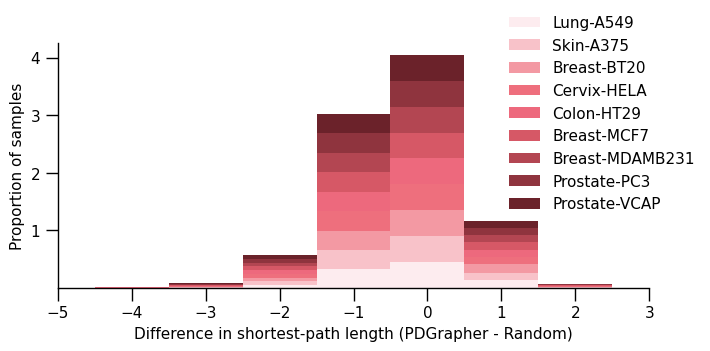

In [27]:
####Stacked histogram of the distances of PDGrapher - Random for all cell lines togheter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


cell_lines = list(all_lengths_ours_to_real.keys())

# Predefined colors for each cell line
cell_line_colors = {
    'A549': '#fdecef',    # Very light pink
    'A375': '#f8c2c9',    # Light pink
    'BT20': '#f399a3',    # Soft pink
    'HELA': '#ee6f7d',    # Medium light pink
    'HT29': '#ed697d',    # Medium pink
    'MCF7': '#d65866',    # Darker pink
    'MDAMB231': '#b34652',# Rich pink
    'PC3': '#8f343e',     # Deeper pink
    'VCAP': '#6b222a'     # Darkest pink
}
# Set up the bins based on the possible range of differences
all_differences = []

for cell_line in cell_lines:
    lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
    lengths_random_to_real = all_lengths_random_to_real[cell_line]
    
    # Compute the element-wise difference (random - ours)
    difference_lengths =  np.array(lengths_ours_to_real) - np.array(lengths_random_to_real)
    all_differences.extend(difference_lengths)

bins = np.arange(min(all_differences), max(all_differences) + 1) - 0.5

with sns.plotting_context(plotting_context):
    # Set up the plot
    fig, ax = plt.subplots(figsize=(7.35, 3.4))

    # Plot stacked histogram
    bottoms = np.zeros(len(bins) - 1)

    for cell_line in cell_lines:
        lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
        lengths_random_to_real = all_lengths_random_to_real[cell_line]
        
        # Compute the element-wise difference (random - ours)
        difference_lengths = np.array(lengths_ours_to_real) - np.array(lengths_random_to_real)
        
        # Calculate the histogram counts
        counts, _ = np.histogram(difference_lengths, bins=bins)
        
        # Normalize to get proportions
        proportions = counts / np.sum(counts)
        
        # Plot the proportion-based histogram for this cell line
        ax.bar(bins[:-1] + 0.5, proportions, bottom=bottoms, width=1.0, color=cell_line_colors[cell_line], label=cell_line_to_cancer_type[cell_line])
        
        # Update the bottom position for the next stack
        bottoms += proportions
        print('Average difference PDGrapher vs Random for {}: {:.2f} vs {:.2f}'.format(cell_line, np.mean(lengths_ours_to_real), np.mean(lengths_random_to_real)))

    # Adding labels and title
    ax.set_xlabel('Difference in shortest-path length (PDGrapher - Random)')
    ax.set_ylabel('Proportion of samples')
    ax.set_title('')
    ax.set_xlim(-5, 3)

    # Customize the legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.10, 1.17), frameon=False, title=None)
    sns.despine()
    plt.subplots_adjust(bottom=0.16, right=0.93)
    plt.savefig(osp.join(outdir, 'stacked_histogram_proportion_difference_random_pdgrapher.pdf'), transparent=True)
    plt.show()


In [24]:

# #Put all data together
# lengths_ours_to_real = np.concatenate([all_lengths_ours_to_real[e] for e in all_lengths_ours_to_real]).tolist()
# lengths_random_to_real = np.concatenate([all_lengths_random_to_real[e] for e in all_lengths_random_to_real]).tolist()
# data = pd.DataFrame([lengths_ours_to_real + lengths_random_to_real, ['PDGrapher' for i in range(len(lengths_ours_to_real))] + ['Random' for i in range(len(lengths_random_to_real))]]).transpose()
# data.columns = ['distance', 'Model']

# colors = ['#04C4D9', '#333333']

# with sns.plotting_context(plotting_context_small):
#     sns.set_palette(sns.color_palette(colors))

#     weights_ours = np.ones_like(lengths_ours_to_real) / len(lengths_ours_to_real)
#     weights_random = np.ones_like(lengths_random_to_real) / len(lengths_random_to_real)
#     weights = np.concatenate([weights_ours, weights_random])
#     data['weights'] = weights
#     ax = sns.displot(data, x="distance", hue='Model', multiple='dodge', discrete=True, alpha = 0.8, weights='weights', height=1.7, aspect=0.7)

#     ax.set(xlabel='Shortest-path length', ylabel='Proportion of samples')
#     sns.move_legend(
#                         ax, "lower left",
#                         bbox_to_anchor=(.58, 0.7), ncol=1, title=None, frameon=False,
#                     )
#     plt.subplots_adjust(top=0.9, right=0.95, left=0.2)
#     plt.savefig(osp.join(outpath, '../../panel_distribution_network_distance_model_vs_random_alltogether.pdf'.format(cell_line)), transparent=True)
#     plt.close()

In [25]:

# #Individual plots

# for cell_line in all_lengths_ours_to_real.keys():
#     lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
#     lengths_random_to_real = all_lengths_random_to_real[cell_line]
    
#     data = pd.DataFrame([lengths_ours_to_real + lengths_random_to_real, ['PDGrapher' for i in range(len(lengths_ours_to_real))] + ['Random' for i in range(len(lengths_random_to_real))]]).transpose()
#     data.columns = ['distance', 'Model']

#     colors = ['#04C4D9', '#333333']

#     with sns.plotting_context(plotting_context_small):
#         sns.set_palette(sns.color_palette(colors))

#         weights_ours = np.ones_like(lengths_ours_to_real) / len(lengths_ours_to_real)
#         weights_random = np.ones_like(lengths_random_to_real) / len(lengths_random_to_real)
#         weights = np.concatenate([weights_ours, weights_random])
#         data['weights'] = weights
#         ax = sns.displot(data, x="distance", hue='Model', multiple='dodge', discrete=True, alpha = 0.8, weights='weights', height=1.7, aspect=0.7)

#         ax.set(xlabel='Shortest-path length', ylabel='Proportion of samples')
#         sns.move_legend(
#                             ax, "lower left",
#                             bbox_to_anchor=(.58, 0.7), ncol=1, title=None, frameon=False,
#                         )
#         plt.subplots_adjust(top=0.9, right=0.95, left=0.2)
#         plt.savefig(osp.join(cell_line_path_dict[cell_line], 'panel_distribution_network_distance_model_vs_random_{}.pdf'.format(cell_line)), transparent=True)
#         plt.close()
            